In [3]:
def smarts_from_substructure_smiles(substructure_smiles):
    substructure_mol = rdkit.Chem.MolFromSmiles(substructure_smiles)
    substructure_smarts = rdkit.Chem.MolToSmarts(substructure_mol)
    print (f"substructure_smarts is {substructure_smarts}")
    substructure_mol = rdkit.Chem.MolFromSmarts(substructure_smarts)
    return substructure_mol, substructure_smarts

substructure_smarts is [#6]1-[#6]2:[#6]:[#6]:[#6]:[#6]:[#6]:2-[#6]2:[#6]:[#6]:[#6]:[#6]:[#6]:2-1


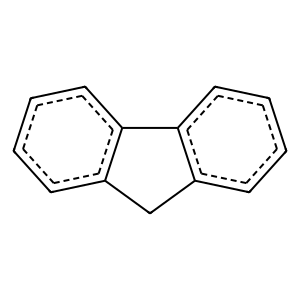

In [4]:
# Input the smiles string of interest:
fluorene_smiles = 'C1C2=CC=CC=C2C3=CC=CC=C31'
fluorene_mol, fluorene_smarts = smarts_from_substructure_smiles(fluorene_smiles)
# Then plot the substructure to check it is correct (visually)
rdkit.Chem.Draw.MolToImage(fluorene_mol)


In [8]:
chromophore_data = pd.read_parquet("data/Chromophore_Sci_Data.parquet")
chromophore_data.head()

,SMILES,LambdaMaxAbs,LambdaMaxEm,Lifetime,QY,LogExtCoeff,AbsFWHMcm-1,EmFWHMcm-1,AbsFWHMnm,EmFWHMnm,MolarMass,SELFIES
0,N#Cc1cc2ccc(O)cc2oc1=O,355.0,410.00,2.804262,NaN,NaN,NaN,NaN,NaN,NaN,187.15370,[N][#C][C][=C][C][=C][C][=C][Branch1][C][O][C]...
1,N#Cc1cc2ccc([O-])cc2oc1=O,408.0,450.00,3.961965,NaN,NaN,NaN,NaN,NaN,43.0,186.14576,[N][#C][C][=C][C][=C][C][=C][Branch1][C][O-1][...
2,CCCCCCCCCCCC#CC#CCCCCCCCCCN1C(=O)c2ccc3c4ccc5c...,526.0,535.00,3.602954,NaN,NaN,NaN,NaN,NaN,NaN,1061.54348,[C][C][C][C][C][C][C][C][C][C][C][C][#C][C][#C...
3,[O-]c1c(-c2nc3ccccc3s2)cc2ccc3cccc4ccc1c2c34,514.0,553.72,3.810000,NaN,NaN,NaN,NaN,NaN,67.4,350.42028,[O-1][C][=C][Branch1][=C][C][=N][C][=C][C][=C]...
4,[O-]c1c(-c2nc3ccccc3s2)cc2ccc3cccc4ccc1c2c34,524.0,555.00,4.700000,NaN,NaN,NaN,NaN,58.0,50.0,350.42028,[O-1][C][=C][Branch1][=C][C][=N][C][=C][C][=C]...


In [15]:
# remove all rows where fluorene is not a substructure of the molecule
# first add a column 'mol' to the dataframe
chromophore_data['mol'] = chromophore_data['SMILES'].apply(rdkit.Chem.MolFromSmiles)
chromophore_data = chromophore_data[chromophore_data['mol'].apply(lambda mol: mol.HasSubstructMatch(fluorene_mol))]
# reset the index
chromophore_data = chromophore_data.reset_index(drop=True)
# now drop the 'mol' column
chromophore_data = chromophore_data.drop(columns=['mol'])
print (len(chromophore_data))
chromophore_data.head()

896


,SMILES,LambdaMaxAbs,LambdaMaxEm,Lifetime,QY,LogExtCoeff,AbsFWHMcm-1,EmFWHMcm-1,AbsFWHMnm,EmFWHMnm,MolarMass,SELFIES
0,CC1(C)c2ccccc2-c2ccc(N3c4ccc(-c5ccc(/C=C6\C(=O...,608.0,741.0,1.04,0.18,4.792392,NaN,NaN,NaN,NaN,633.76614,[C][C][Branch1][C][C][C][=C][C][=C][C][=C][Rin...
1,CCCCCCc1cc(-c2ccc3c(c2)C2CCCC2N3c2ccc3c(c2)C(C...,611.0,732.0,1.32,0.24,4.908485,NaN,NaN,NaN,NaN,717.92742,[C][C][C][C][C][C][C][C][=C][Branch2][Ring2][S...
2,F[B-]1(F)OC(c2ccc3c(c2)Cc2ccccc2-3)=CC(c2ccccc...,412.0,491.0,2.60,0.96,4.805501,NaN,NaN,50.8,74.4,360.16610,[F][B-1][Branch1][C][F][O][C][Branch2][Ring1][...
3,COc1ccc(C2=[O+][B-](F)(F)OC(c3ccc4c(c3)Cc3cccc...,424.0,466.0,1.60,0.94,4.855519,NaN,NaN,54.4,56.0,390.19198,[C][O][C][=C][C][=C][Branch2][Ring2][Branch2][...
4,CCCCCCC1(CCCCCC)c2ccccc2-c2ccc(-c3ccc(-c4cc(-c...,327.0,409.0,0.77,0.92,4.560000,NaN,NaN,NaN,NaN,641.90018,[C][C][C][C][C][C][C][Branch1][#Branch1][C][C]...


In [16]:
def parquet_the_bus (df, parquet_filename: str):
    df.to_parquet(parquet_filename)
    return

In [17]:
parquet_the_bus (chromophore_data, "data/Chromophore_Sci_Data_Fluorene_Substructure.parquet")

In [ ]:
# Testing feature generation functions
smiles = chromophore_data['SMILES'].tolist()

fluorene_features_df = generate_features_for_smiles(
    smiles,
    descriptors=grid.feature_names_in_, # type: ignore
    missing_value=None,
    log_missing=True)


In [ ]:
pred_from_features = grid.predict(features_df)

plot_results(
    y=sample_y["LambdaMaxAbs"],
    y_hat=pred_from_features,
    title=f"Test Feature Generation - LambdaMaxAbs",
)